### Imports

In [52]:
! pip install unidecode
! pip install transformers
! pip install torch
! pip install spacy
! pip install pandas
! pip install gensim
! pip install xgboost
! pip install gensim
! pip install scikit-learn
! pip install unidecode
! pip install torch.utils.data
! pip install seaborn
! pip install matplotlib
! pip install nltk

import pandas as pd
import re
import spacy
import string
import numpy as np
import nltk
import torch
import sklearn
import matplotlib.pyplot as plt
import seaborn
from gensim.models import Word2Vec
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from unidecode import unidecode
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement torch.utils.data (from versions: none)
ERROR: No matching distribution found for torch.utils.data

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')
stemmer = SnowballStemmer('english')
STOP_WORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset

In [54]:
df = pd.read_csv('sample_data/racism-dataset.csv', sep=',', index_col=0)
df.head(10)

,label,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...
10,0,@user @user welcome here ! i'm it's so #gr8 !


In [55]:
MAX_PREDOMINANT_LABEL_SAMPLES = 10000

dfNonHate = df[df["label"] == 0].head(MAX_PREDOMINANT_LABEL_SAMPLES)
dfHate = df[df["label"] == 1]

df = pd.concat([dfNonHate, dfHate])

### Train & test splits

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.4, random_state=42)

print('train data length:', len(X_train))
print('test data length:', len(X_test))

train data length: 7345
test data length: 4897


In [57]:
dfTrainTfidf = pd.DataFrame(list(zip(X_train, y_train)), columns =['text', 'label'])
dfTrainTfidf.head()

dfTrainCbow = pd.DataFrame(list(zip(X_train, y_train)), columns =['text', 'label'])
dfTrainCbow.head()

,text,label
0,keeping to my happiness goals for the month - ...,0
1,@user as a huge @user fan i'm excited for liv...,0
2,ððlove girlsðð #bihday #yuiko#pa...,0
3,"this much #hatred, #xenophobia, #islamophobia,...",1
4,@user can't wait... excited to watch lemans th...,0


In [58]:
dfTestTfidf = pd.DataFrame(list(zip(X_test, y_test)), columns =['text', 'label'])
dfTestTfidf.head()

dfTestCbow = pd.DataFrame(list(zip(X_test, y_test)), columns =['text', 'label'])
dfTestCbow.head()

,text,label
0,i worked to had for this #highschoolgraduation...,0
1,so proud to have a mayor like @user who isnt a...,1
2,#bihday #shout #out to my broda @user smile ...,0
3,i am wholesome. #i_am #positive #affirmation,0
4,#nazi #swastika #ebay! #trump #donaldtrump #re...,1


### Preprocessing

In [59]:
def apply(df, functions):
    for f in functions:
        df = df.apply(f)
    return df

def removeHyperlinks(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

def removeHandles(text):
    return re.sub(r'@[\w]*', ' ', text)

def removeHashtags(text):
    return re.sub(r'#', ' ', text)

def removeHashtagsAndWords(text):
    return re.sub(r'#[\w]*', ' ', text)

def removeRepeating(text):
    return re.sub(r'([a-zA-Z])\1{2,}', r'\1', text)

def removeWhitespaces(text):
    return re.sub(r'\s+', ' ', text)

def removeDigits(text):
    return re.sub(r'\d+', '', text)

def unidecodeLowercase(text):
    return unidecode(text.lower())

def removePunctuation(text):
    return "".join(c if c not in string.punctuation else ' ' for c in text)

def removeStopwords(text):
    return " ".join([w for w in text.split() if w.lower() not in STOP_WORDS and len(w) > 2])

def stem(text):
    return " ".join([stemmer.stem(token) for token in text.split()])

def lemma(text):
    return " ".join([w.lemma_ for w in nlp(text)])

In [60]:
tfIdf_preprocessing = [
    unidecodeLowercase,
    removeHyperlinks,
    removeHandles,
    removeHashtags,
    removePunctuation,
    removeDigits,
    removeRepeating,
    lemma,
    removeStopwords,
    removeWhitespaces
]

cbow_preprocessing = [
    unidecodeLowercase,
    removeHyperlinks,
    removeHandles,
    removeHashtagsAndWords,
    removePunctuation,
    removeDigits,
    removeRepeating,
    lemma,
    removeStopwords,
    removeWhitespaces
]

In [61]:
dfTrainTfidf['clean'] = apply(dfTrainTfidf['text'], tfIdf_preprocessing)
dfTrainTfidf['tokens'] = [text.split() for text in dfTrainTfidf['clean'].tolist()]

dfTrainTfidf.head(10)

,text,label,clean,tokens
0,keeping to my happiness goals for the month - ...,0,keep happiness goal month outside get fresh ai...,"[keep, happiness, goal, month, outside, get, f..."
1,@user as a huge @user fan i'm excited for liv...,0,huge fan excited live stream amp midday via gi...,"[huge, fan, excited, live, stream, amp, midday..."
2,ððlove girlsðð #bihday #yuiko#pa...,0,ddlove girlsdd bihday yuiko paya,"[ddlove, girlsdd, bihday, yuiko, paya]"
3,"this much #hatred, #xenophobia, #islamophobia,...",1,much hatred xenophobia islamophobia antisemiti...,"[much, hatred, xenophobia, islamophobia, antis..."
4,@user can't wait... excited to watch lemans th...,0,wait excited watch leman year lemans lemans le...,"[wait, excited, watch, leman, year, lemans, le..."
5,lol i just feel and #useless,0,lol feel useless,"[lol, feel, useless]"
6,is defunding aboion and sending you to the #...,1,defunde aboion send inauguration,"[defunde, aboion, send, inauguration]"
7,there are ceain happenings in our lives that w...,0,ceain happening life woh like agree life,"[ceain, happening, life, woh, like, agree, life]"
8,train tickets booked for my opera week in wales,0,train ticket book opera week wale,"[train, ticket, book, opera, week, wale]"
9,#e3 just isn't the same without @user @user @u...,0,without cover together gwaslife missyouguy,"[without, cover, together, gwaslife, missyouguy]"


In [62]:
dfTestTfidf['clean'] = apply(dfTestTfidf['text'], tfIdf_preprocessing)
dfTestTfidf['tokens'] = [text.split() for text in dfTestTfidf['clean'].tolist()]

dfTestTfidf.head(10)

,text,label,clean,tokens
0,i worked to had for this #highschoolgraduation...,0,work highschoolgraduation classof diploma,"[work, highschoolgraduation, classof, diploma]"
1,so proud to have a mayor like @user who isnt a...,1,proud mayor like afraid speak truth yes comple...,"[proud, mayor, like, afraid, speak, truth, yes..."
2,#bihday #shout #out to my broda @user smile ...,0,bihday shout broda smile shine like star whilea,"[bihday, shout, broda, smile, shine, like, sta..."
3,i am wholesome. #i_am #positive #affirmation,0,wholesome positive affirmation,"[wholesome, positive, affirmation]"
4,#nazi #swastika #ebay! #trump #donaldtrump #re...,1,nazi swastika ebay trump donaldtrump republic ...,"[nazi, swastika, ebay, trump, donaldtrump, rep..."
5,"@user disgusting racist thugs, look forward to...",1,disgusting racist thug look forward back jail,"[disgusting, racist, thug, look, forward, back..."
6,boummmmm cleveland ð #teamlebron #clevelan...,0,boum cleveland teamlebron cleveland nba basket...,"[boum, cleveland, teamlebron, cleveland, nba, ..."
7,fathers day to mine and all! #thankspop,0,father day mine thankspop,"[father, day, mine, thankspop]"
8,"@user with all,due respect he was m.m.a.#lege...",0,due respect legend rip kimbo loss,"[due, respect, legend, rip, kimbo, loss]"
9,"@user it's laughable to see all these ""celebri...",0,laughable see celebrity ali funeral funeral se...,"[laughable, see, celebrity, ali, funeral, fune..."


In [63]:
dfTrainCbow['clean'] = apply(dfTrainCbow['text'], cbow_preprocessing)
dfTrainCbow['tokens'] = [text.split() for text in dfTrainCbow['clean'].tolist()]

dfTrainCbow.head(10)

,text,label,clean,tokens
0,keeping to my happiness goals for the month - ...,0,keep happiness goal month outside get fresh ai...,"[keep, happiness, goal, month, outside, get, f..."
1,@user as a huge @user fan i'm excited for liv...,0,huge fan excited live stream amp midday via,"[huge, fan, excited, live, stream, amp, midday..."
2,ððlove girlsðð #bihday #yuiko#pa...,0,ddlove girlsdd,"[ddlove, girlsdd]"
3,"this much #hatred, #xenophobia, #islamophobia,...",1,much much let hope get less,"[much, much, let, hope, get, less]"
4,@user can't wait... excited to watch lemans th...,0,wait excited watch leman year,"[wait, excited, watch, leman, year]"
5,lol i just feel and #useless,0,lol feel,"[lol, feel]"
6,is defunding aboion and sending you to the #...,1,defunde aboion send,"[defunde, aboion, send]"
7,there are ceain happenings in our lives that w...,0,ceain happening life woh like agree,"[ceain, happening, life, woh, like, agree]"
8,train tickets booked for my opera week in wales,0,train ticket book opera week wale,"[train, ticket, book, opera, week, wale]"
9,#e3 just isn't the same without @user @user @u...,0,without cover together,"[without, cover, together]"


In [64]:
dfTestCbow['clean'] = apply(dfTestCbow['text'], cbow_preprocessing)
dfTestCbow['tokens'] = [text.split() for text in dfTestCbow['clean'].tolist()]

dfTestCbow.head(10)

,text,label,clean,tokens
0,i worked to had for this #highschoolgraduation...,0,work,[work]
1,so proud to have a mayor like @user who isnt a...,1,proud mayor like afraid speak truth yes comple...,"[proud, mayor, like, afraid, speak, truth, yes..."
2,#bihday #shout #out to my broda @user smile ...,0,broda smile shine like star whilea,"[broda, smile, shine, like, star, whilea]"
3,i am wholesome. #i_am #positive #affirmation,0,wholesome,[wholesome]
4,#nazi #swastika #ebay! #trump #donaldtrump #re...,1,,[]
5,"@user disgusting racist thugs, look forward to...",1,disgusting racist thug look forward back jail,"[disgusting, racist, thug, look, forward, back..."
6,boummmmm cleveland ð #teamlebron #clevelan...,0,boum cleveland,"[boum, cleveland]"
7,fathers day to mine and all! #thankspop,0,father day mine,"[father, day, mine]"
8,"@user with all,due respect he was m.m.a.#lege...",0,due respect rip loss,"[due, respect, rip, loss]"
9,"@user it's laughable to see all these ""celebri...",0,laughable see celebrity ali funeral funeral se...,"[laughable, see, celebrity, ali, funeral, fune..."


### Feature extraction

##### Tf-idf features

In [65]:
tfidf = TfidfVectorizer(
    lowercase=True,
    ngram_range=(2, 8),
    max_features=None,
    analyzer='char',
    binary=True,
    strip_accents='unicode',
)

In [66]:
train_tfidf_features = tfidf.fit_transform(dfTrainTfidf['clean'].tolist())

feature_names = tfidf.get_feature_names_out()
feature_names

array([' a', ' aa', ' aae', ..., 'zzy reci', 'zzy rel', 'zzy rela'],
      dtype=object)

In [67]:
test_tfidf_features = tfidf.transform(dfTestTfidf['clean'].tolist())

##### Cbow features

In [68]:
cbow = Word2Vec(
    min_count=1,
    vector_size=1000,
    window=5,
    sg=0, # sg = 0 => CBOW
)

In [69]:
cbow.build_vocab(dfTrainCbow['tokens'].tolist())
cbow.train(dfTrainCbow['tokens'], total_examples=cbow.vector_size, epochs=200)

word2vec_features = cbow.wv

train_features = [
    [cbow.wv[token] if token in cbow.wv else np.zeros(cbow.vector_size) for token in row] 
    if len(row) else [np.zeros(cbow.vector_size)] for row in dfTrainCbow['tokens']]


print(len(train_features))

train_cbow_features = np.array([np.sum(features, axis=0) for features in train_features])
train_cbow_features_normalized = sklearn.preprocessing.MinMaxScaler().fit_transform(train_cbow_features)

7345


In [70]:
test_features = [
    [cbow.wv[token] if token in cbow.wv else np.zeros(cbow.vector_size) for token in row] 
    if len(row) else [np.zeros(cbow.vector_size)] for row in dfTestCbow['tokens']]

print(len(test_features))

test_cbow_features = np.array([np.sum(features, axis=0) for features in test_features])
test_cbow_features_normalized = sklearn.preprocessing.MinMaxScaler().fit_transform(test_cbow_features)

4897


### Models

In [71]:
def print_confusion_matrix(y_true, y_pred, title):
    title += "    f1: " + "{:.2f}".format(f1_score(y_test, y_pred, average="macro"))
    matrix = confusion_matrix(y_true, y_pred)
    seaborn.heatmap(matrix, annot=True, fmt='g')
    plt.title(title)

##### Multinomial Naive Bayes with Tf-Idf

In [72]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(train_tfidf_features, y_train)

MultinomialNB()

In [73]:
y_pred = mnb_tfidf.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4021
           1       0.99      0.12      0.22       876

    accuracy                           0.84      4897
   macro avg       0.92      0.56      0.57      4897
weighted avg       0.87      0.84      0.79      4897



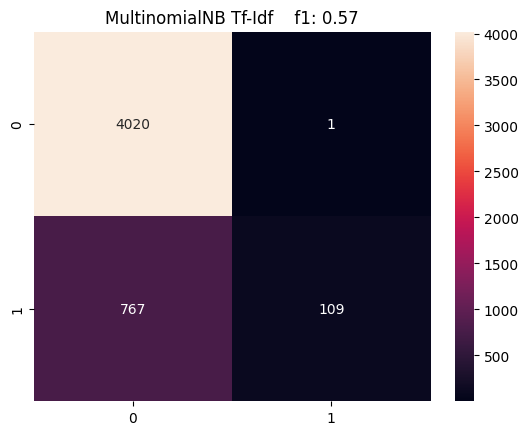

In [74]:
print_confusion_matrix(y_test, y_pred, "MultinomialNB Tf-Idf")

##### Multinomial Naive Bayes with Normalized CBOW

In [75]:
mnb_cbow = MultinomialNB()
mnb_cbow.fit(train_cbow_features_normalized, y_train)

MultinomialNB()

In [76]:
y_pred = mnb_cbow.predict(test_cbow_features_normalized)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      4021
           1       0.67      0.23      0.35       876

    accuracy                           0.84      4897
   macro avg       0.76      0.60      0.63      4897
weighted avg       0.82      0.84      0.81      4897



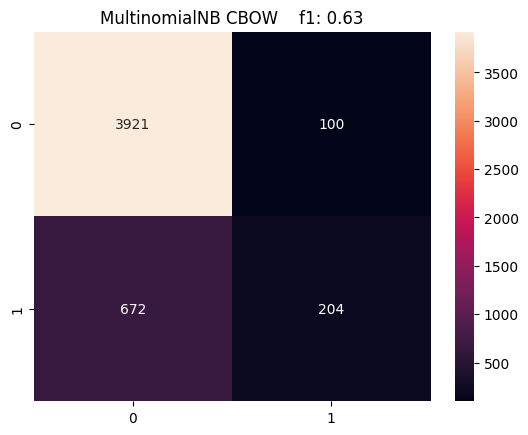

In [77]:
print_confusion_matrix(y_test, y_pred, "MultinomialNB CBOW")

##### Ridge with Tf-Idf

In [78]:
rc_tfidf = RidgeClassifier()
rc_tfidf.fit(train_tfidf_features, y_train)

RidgeClassifier()

In [79]:
y_pred = rc_tfidf.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4021
           1       0.91      0.67      0.77       876

    accuracy                           0.93      4897
   macro avg       0.92      0.83      0.86      4897
weighted avg       0.93      0.93      0.92      4897



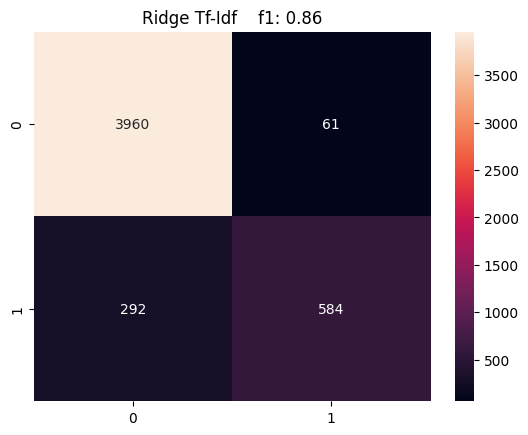

In [80]:
print_confusion_matrix(y_test, y_pred, "Ridge Tf-Idf")

##### Ridge with CBOW

In [81]:
rc_cbow = RidgeClassifier()
rc_cbow.fit(train_cbow_features, y_train)

RidgeClassifier()

In [82]:
y_pred = rc_cbow.predict(test_cbow_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4021
           1       0.76      0.36      0.49       876

    accuracy                           0.87      4897
   macro avg       0.82      0.67      0.70      4897
weighted avg       0.85      0.87      0.84      4897



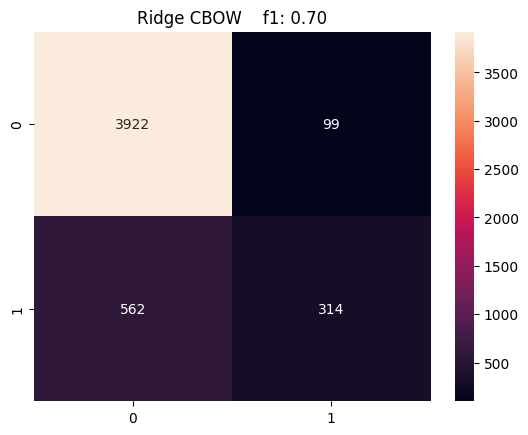

In [83]:
print_confusion_matrix(y_test, y_pred, "Ridge CBOW")

##### RBF SVC with Tf-Idf

In [84]:
svc_tfidf = SVC(kernel='rbf', C=1.1)
svc_tfidf.fit(train_tfidf_features, y_train)

SVC(C=1.1)

In [85]:
y_pred = svc_tfidf.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4021
           1       0.94      0.56      0.70       876

    accuracy                           0.92      4897
   macro avg       0.92      0.78      0.83      4897
weighted avg       0.92      0.92      0.91      4897



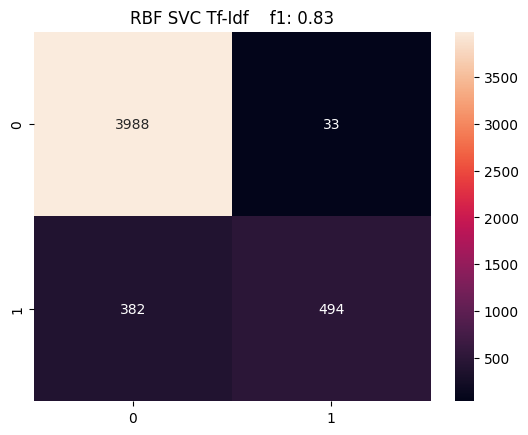

In [86]:
print_confusion_matrix(y_test, y_pred, "RBF SVC Tf-Idf")

##### RBF SVC with CBOW

In [87]:
svc_cbow = SVC(kernel='rbf', C=1.1)
svc_cbow.fit(train_cbow_features, y_train)

SVC(C=1.1)

In [88]:
y_pred = svc_cbow.predict(test_cbow_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4021
           1       0.80      0.44      0.57       876

    accuracy                           0.88      4897
   macro avg       0.85      0.71      0.75      4897
weighted avg       0.87      0.88      0.87      4897



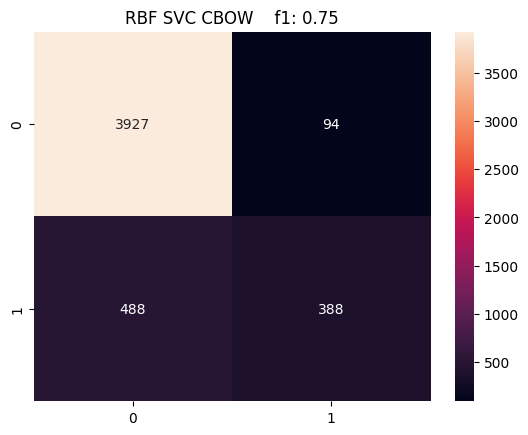

In [89]:
print_confusion_matrix(y_test, y_pred, "RBF SVC CBOW")

##### Linear SVC with Tf-Idf

In [90]:
lsvc_tfidf = LinearSVC(C=1.1)
lsvc_tfidf.fit(train_tfidf_features, y_train)

LinearSVC(C=1.1)

In [91]:
y_pred = lsvc_tfidf.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4021
           1       0.89      0.72      0.79       876

    accuracy                           0.93      4897
   macro avg       0.91      0.85      0.88      4897
weighted avg       0.93      0.93      0.93      4897



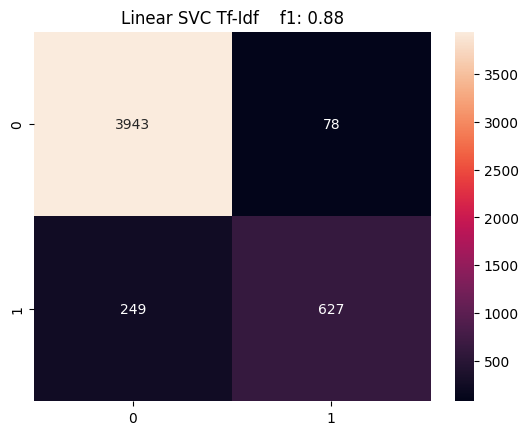

In [92]:
print_confusion_matrix(y_test, y_pred, "Linear SVC Tf-Idf")

In [93]:
y_test.tolist()[0]

0

In [94]:
# retrieval of false negatives
cnt = 0

for i in range(len(y_pred)):
    if y_pred[i] == 0 and y_test.tolist()[i] == 1 and cnt < 1000:
        print(dfTestTfidf['text'][i])
        cnt += 1


so proud to have a mayor like @user who isnt afraid to speak the truth..and yes he is completely rightâ¦
bruh  &amp;  are nothing new... that whole #deltaairlines debacle would've went downâ¦
@user snatch that wig off james brown head &amp; get her out !
@user @user #storyville , "forever pure - #football and  in #jerusalem" on @user  â¦ 
check out this flyer for #trump! yay titties! question: do we have to bring our own pussy to grab, or will pussy beâ¦ 
so when is the next klan meeting?
@user no as u have termed him an outsider who gave u that right? i only said @user is more indian than many of us.â¦
'@user  the #14th amendment  #blm discussed here thanks @user    '
the inter-terrestrial #scifi #sciencefiction on #kindleunlimited   #99cents in #january #2017 #kindle
@user i thought she had 72 assistants. #gladshesgone  #nohope
on the nose: perfumer sparks  furore
why only target little #muslim children for mispronouncing "terraced house" &amp; treat them like criminals!â¦ 
see

##### Linear SVC with CBOW

In [95]:
lsvc_cbow = LinearSVC(max_iter=5000)
lsvc_cbow.fit(train_cbow_features, y_train)

LinearSVC(max_iter=5000)

In [96]:
y_pred = lsvc_cbow.predict(test_cbow_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4021
           1       0.75      0.46      0.57       876

    accuracy                           0.88      4897
   macro avg       0.82      0.72      0.75      4897
weighted avg       0.87      0.88      0.86      4897



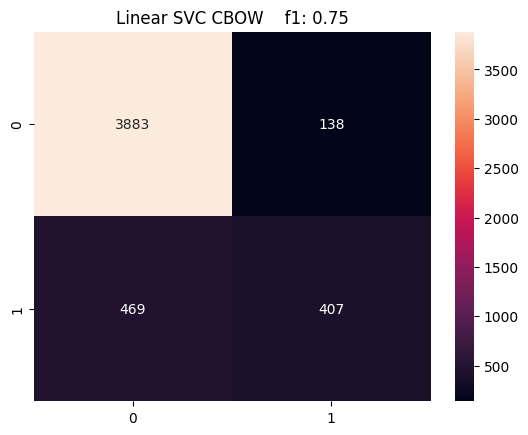

In [97]:
print_confusion_matrix(y_test, y_pred, "Linear SVC CBOW")

##### Gradient Boosting with Tf-Idf

In [98]:
gradient_tfidf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.75)
gradient_tfidf.fit(train_tfidf_features, y_train)

GradientBoostingClassifier(subsample=0.75)

In [99]:
y_pred = gradient_tfidf.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4021
           1       0.85      0.52      0.65       876

    accuracy                           0.90      4897
   macro avg       0.88      0.75      0.80      4897
weighted avg       0.90      0.90      0.89      4897



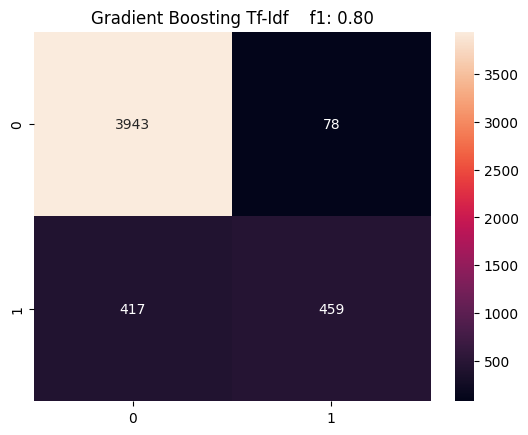

In [100]:
print_confusion_matrix(y_test, y_pred, "Gradient Boosting Tf-Idf")

##### Gradient Boosting with CBOW

In [101]:
gradient_cbow = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.75)
gradient_cbow.fit(train_cbow_features, y_train)

GradientBoostingClassifier(subsample=0.75)

In [102]:
y_pred = gradient_cbow.predict(test_cbow_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4021
           1       0.76      0.48      0.59       876

    accuracy                           0.88      4897
   macro avg       0.83      0.72      0.76      4897
weighted avg       0.87      0.88      0.87      4897



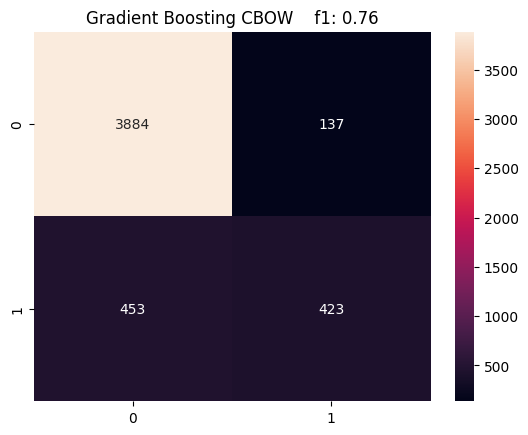

In [103]:
print_confusion_matrix(y_test, y_pred, "Gradient Boosting CBOW")

##### Neural Network with Tf-Idf

In [ ]:
neural_tfidf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=0, max_iter=500)
neural_tfidf.fit(train_tfidf_features, y_train)

In [ ]:
y_pred = neural_tfidf.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4021
           1       0.83      0.76      0.80       876

    accuracy                           0.93      4897
   macro avg       0.89      0.86      0.88      4897
weighted avg       0.93      0.93      0.93      4897



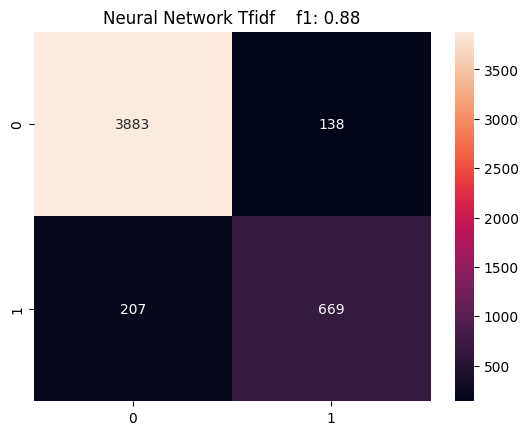

In [ ]:
print_confusion_matrix(y_test, y_pred, "Neural Network Tfidf")

##### Neural Network with CBOW

In [ ]:
neural_cbow = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=0, max_iter=5000)
neural_cbow.fit(train_cbow_features, y_train)

MLPClassifier(alpha=1e-05, max_iter=5000, random_state=0, solver='lbfgs')

In [ ]:
y_pred = neural_cbow.predict(test_cbow_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4021
           1       0.57      0.60      0.58       876

    accuracy                           0.85      4897
   macro avg       0.74      0.75      0.75      4897
weighted avg       0.85      0.85      0.85      4897



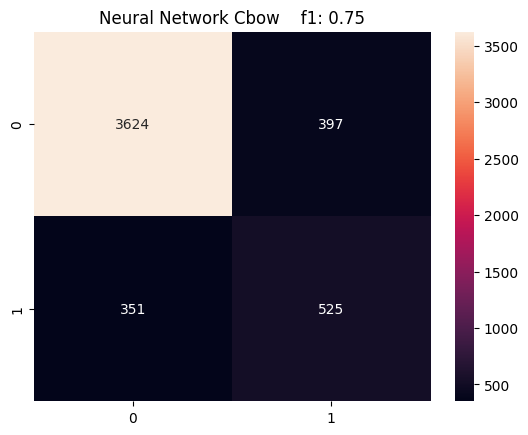

In [ ]:
print_confusion_matrix(y_test, y_pred, "Neural Network Cbow")

##### XGBoost with Tf-Idf

In [ ]:
xgboost = XGBClassifier(learning_rate=0.15, gamma=0.5, reg_alpha=0.5, max_depth=10, subsample=0.8, colsample_bytree=0.75, n_estimators=475)
xgboost.fit(train_tfidf_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=475, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgboost.predict(test_tfidf_features)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4021
           1       0.83      0.64      0.73       876

    accuracy                           0.91      4897
   macro avg       0.88      0.81      0.84      4897
weighted avg       0.91      0.91      0.91      4897



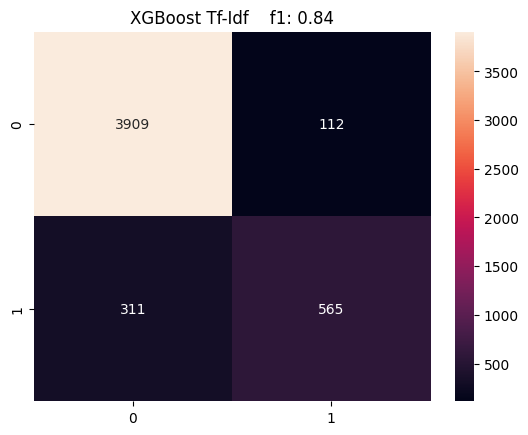

In [ ]:
print_confusion_matrix(y_test, y_pred, "XGBoost Tf-Idf")